In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import set_config
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

set_config(print_changed_only=False)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


<h1 style='color:blue' align='center'>K Means Clustering Algorithm</h1>

- ML algorithms are categorized into three main categories supervised, unsupervised, and reinforcement learning
- Supervised learning is that in the given data set you have your class label or a target variable and features
- Unsupervised learning is that all you have is set of features you don’t know about your target variable or a class label, using this data set we try to identify the underlying structure in that data or we sometimes try to find the clusters in that data and we can make useful predictions out of it
- k means is a very popular clustering algorithm used in unsupervised machine learning algorithm

<img src='./data/kmeansclustering_1.jpg' width=1000 height=600>
<img src='./data/kmeansclustering_2.jpg' width=1000 height=600>

In [2]:
df = pd.read_csv("./data/income.csv")
df.head()
df.shape

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


(22, 3)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income($)')

(0.0, 200000.0)

array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
       175000., 200000.])

[' 0k', ' 25k', ' 50k', ' 75k', ' 100k', ' 125k', ' 150k', ' 175k', ' 200k']

C:\Users\Kwang-Chul Kwon\AppData\Local\Temp\ipykernel_15460\1514080142.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels, fontsize=12)


[Text(0, 0.0, ' 0k'),
 Text(0, 25000.0, ' 25k'),
 Text(0, 50000.0, ' 50k'),
 Text(0, 75000.0, ' 75k'),
 Text(0, 100000.0, ' 100k'),
 Text(0, 125000.0, ' 125k'),
 Text(0, 150000.0, ' 150k'),
 Text(0, 175000.0, ' 175k'),
 Text(0, 200000.0, ' 200k')]

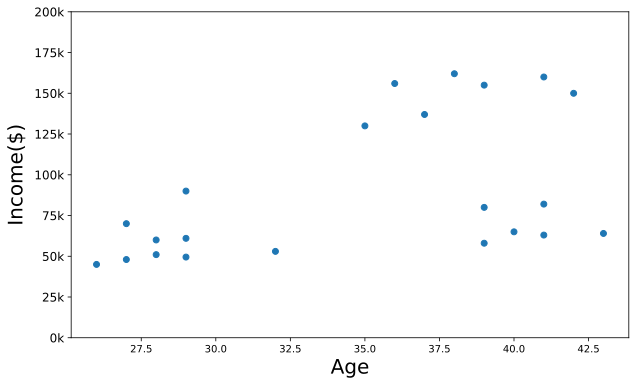

In [3]:
plt.rcParams['figure.figsize']=(10, 6)
ax=plt.subplot()
ax.scatter(df['Age'], df['Income($)'])
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Income($)', fontsize=20)
ax.set_ylim((0, 200000))
ax.get_yticks()

ylabels=[f'{tick/1000: .0f}k'for tick in ax.get_yticks()]

ylabels
ax.set_yticklabels(ylabels, fontsize=12)

In [4]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']]) # Inherently, there is no target so go with fit_predict
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [5]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [6]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

(0.0, 200000.0)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income($)')

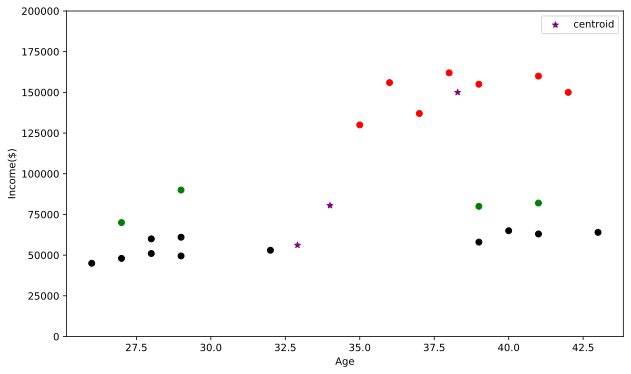

In [7]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

ax=plt.subplot()
ax.set_ylim((0, 200000))
ax.scatter(df1.Age,df1['Income($)'],color='green')
ax.scatter(df2.Age,df2['Income($)'],color='red')
ax.scatter(df3.Age,df3['Income($)'],color='black')

ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

ax.set_xlabel('Age')
ax.set_ylabel('Income($)')
plt.legend()

### Prepreocessing using MinMaxScaler

In [8]:
scaler=MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

MinMaxScaler(clip=False, copy=True, feature_range=(0, 1))

MinMaxScaler(clip=False, copy=True, feature_range=(0, 1))

In [9]:
df

,Name,Age,Income($),cluster
0,Rob,0.06,0.21,0
1,Michael,0.18,0.38,0
2,Mohan,0.18,0.14,2
3,Ismail,0.12,0.13,2
4,Kory,0.94,0.90,1
5,Gautam,0.76,0.94,1
6,David,0.88,0.98,1
7,Andrea,0.71,1.00,1
8,Brad,0.59,0.95,1
9,Angelina,0.53,0.73,1


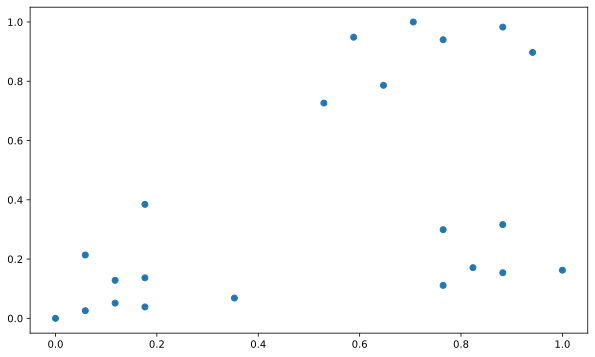

In [10]:
ax=plt.subplot()
ax.scatter(df.Age, df['Income($)'])

In [11]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [12]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.06,0.21,1
1,Michael,0.18,0.38,1
2,Mohan,0.18,0.14,1
3,Ismail,0.12,0.13,1
4,Kory,0.94,0.90,2
5,Gautam,0.76,0.94,2
6,David,0.88,0.98,2
7,Andrea,0.71,1.00,2
8,Brad,0.59,0.95,2
9,Angelina,0.53,0.73,2


In [13]:
centers=km.cluster_centers_
centers

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [14]:
x_axis, y_axis=zip(*centers)
x_axis, y_axis

((0.8529411764705882, 0.13725490196078438, 0.7226890756302521),
 (0.20227920227920232, 0.11633428300094972, 0.8974358974358976))

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income($)')

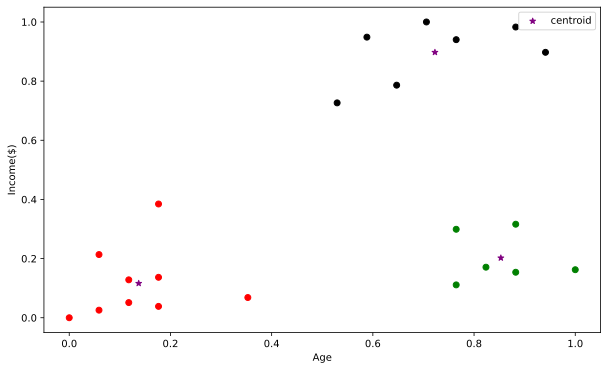

In [15]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

ax=plt.subplot()

ax.scatter(df1.Age,df1['Income($)'],color='green')
ax.scatter(df2.Age,df2['Income($)'],color='red')
ax.scatter(df3.Age,df3['Income($)'],color='black')

ax.scatter(x_axis, y_axis, color='purple', marker='*', label='centroid')

ax.set_xlabel('Age')
ax.set_ylabel('Income($)')
plt.legend()

### Elbow Plot

In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, 'K')

Text(0, 0.5, 'Sum of squared error')

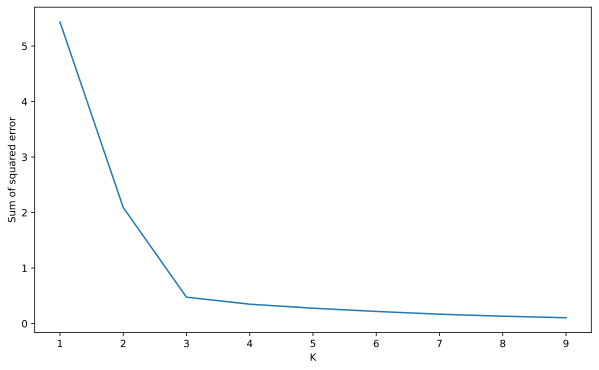

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

### Exercise

- Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
- Figure out if any preprocessing such as scaling would help here
- Draw elbow plot and from that figure out optimal value of k

In [18]:
iris = load_iris()

df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['flower']=iris.target

In [19]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0
3,4.60,3.10,1.50,0.20,0
4,5.00,3.60,1.40,0.20,0
...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,2
146,6.30,2.50,5.00,1.90,2
147,6.50,3.00,5.20,2.00,2
148,6.20,3.40,5.40,2.30,2


In [20]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'], axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.40,0.20
1,1.40,0.20
2,1.30,0.20
3,1.50,0.20
4,1.40,0.20


In [21]:
km=KMeans(n_clusters=3)
yp=km.fit_predict(df)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
df['cluster']=yp
df.head()

,petal length (cm),petal width (cm),cluster
0,1.40,0.20,1
1,1.40,0.20,1
2,1.30,0.20,1
3,1.50,0.20,1
4,1.40,0.20,1


In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

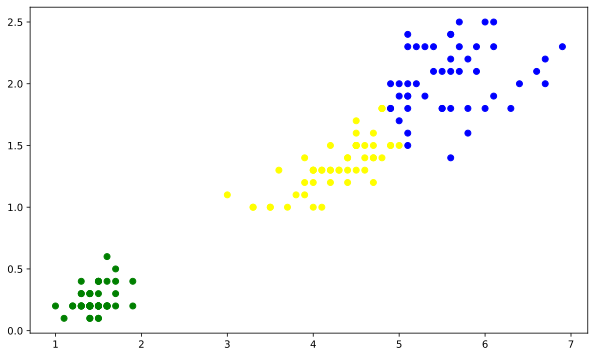

In [24]:
plt.rcParams['figure.figsize']=(10, 6)
ax=plt.subplot()
ax.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
ax.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
ax.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

### Elbow Plot

In [25]:
sse=[]
k_rng=range(1, 10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, 'K')

Text(0, 0.5, 'Sum of Squared Error')

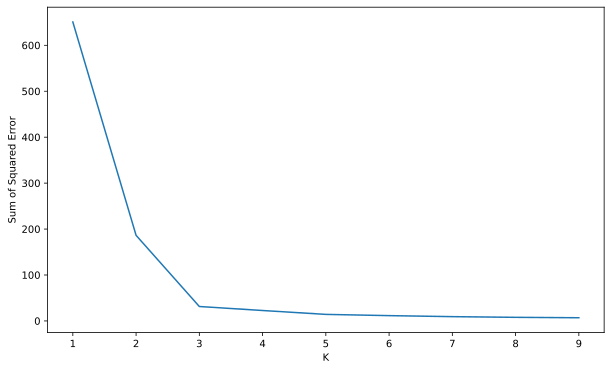

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)